In this notebook I read the frequency differencing variables from ehcoview and categorise them.

In [4]:
import numpy as np
import pandas as pd
import scipy as sc
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib as mpl
from matplotlib.dates import DateFormatter
from scipy import ndimage
import scipy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.io.img_tiles import Stamen, GoogleTiles
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import shapely.geometry as sgeom
from shapely.ops import transform as geom_transform

In [5]:
scipy.__version__

'1.12.0'

## Load data

In [6]:
fname1 = np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S18-Sv38.csv'))
fname2 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv120.csv'))
fname3 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv200.csv'))
fname4 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S120-Sv200.csv'))
fname5 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*S38-Sv70.csv'))
fname6 =  np.sort(glob.glob('D:/Sermilik/NNA_dBDiff_Export/*Resample by number of pings T2.csv'))

df_18_38 = pd.DataFrame()
df_38_120 = pd.DataFrame()
df_38_200 = pd.DataFrame()
df_120_200 = pd.DataFrame()
df_38_70 = pd.DataFrame()
df_38 = pd.DataFrame()

flist = [fname1, fname2, fname3, fname4, fname5, fname6]

for i_flist in range(len(flist)):
    df_all = pd.DataFrame()
    for ind in np.arange(len(flist[i_flist])):
        filename = flist[i_flist][ind]
        df =  pd.read_csv(filename, 
                            header=None,
                            skiprows=1,
                            engine='python')
        df_all = pd.concat([df_all, df])
        df_all.iloc[0:3,13:] = np.nan
        Sv_diff = df_all.iloc[:,13:].T
        Sv_diff.iloc[0:3,:] = np.nan
        
    if i_flist == 0:
        df_18_38 = df_all
        Sv18_38 = Sv_diff
        Sv18_38 = Sv18_38.T.reset_index(drop=True).T
    elif i_flist == 1:
        df_38_120 = df_all
        Sv38_120 = Sv_diff
        Sv38_120 = Sv38_120.T.reset_index(drop=True).T
    elif i_flist == 2:
        df_38_200 = df_all
        Sv38_200 = Sv_diff
        Sv38_200 = Sv38_200.T.reset_index(drop=True).T
    elif i_flist == 3:
        df_120_200 = df_all
        Sv120_200 = Sv_diff
        Sv120_200 = Sv120_200.T.reset_index(drop=True).T
    elif i_flist == 4:
        df_38_70 = df_all
        Sv38_70 = Sv_diff
        Sv38_70 = Sv38_70.T.reset_index(drop=True).T
    elif i_flist == 5:
        df_38 = df_all
        df_38= df_38.reset_index(drop=True)
        Sv38 = Sv_diff
        Sv38 = Sv38.T.reset_index(drop=True).T

        

## Get time array

In [7]:
dtimes_18_38 =[]
for ind in range(0,len(df_18_38)):
            dtimes_18_38 = np.append(dtimes_18_38, datetime.strptime('%s %s.%s' %(df_18_38[3].values[ind],df_18_38[4].values[ind],int(df_18_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

In [8]:
dtimes_38 =[]
for ind in range(0,len(df_38)):
            dtimes_38 = np.append(dtimes_38, datetime.strptime('%s %s.%s' %(df_38[3].values[ind],df_38[4].values[ind],int(df_38[5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

### 120-200

In [9]:
dtimes_120_200 =[]
for ind in range(0,len(df_120_200)):
            dtimes_120_200 = np.append(dtimes_120_200 , datetime.strptime('%s %s.%s' %(df_120_200 [3].values[ind],df_120_200 [4].values[ind],int(df_120_200 [5].values[ind])), '%Y-%m-%d %H:%M:%S.%f'))

In [10]:
trawl1 = datetime(2023,8,7,20,33)
trawl2 = datetime(2023,8,9,11,30)
trawl3 = datetime(2023,8,11,13,2)
trawl4 = datetime(2023,8,16,12,42)
trawl5 = datetime(2023,8,17,9,22)

C:\Users\murield\AppData\Local\Temp\ipykernel_22984\4106081502.py:14: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_22984\4106081502.py:21: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_22984\4106081502.py:27: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cbar = fig.colorbar(ax_sv, shrink=0.8)
C:\Users\murield\AppData\Local\Temp\ipykernel_

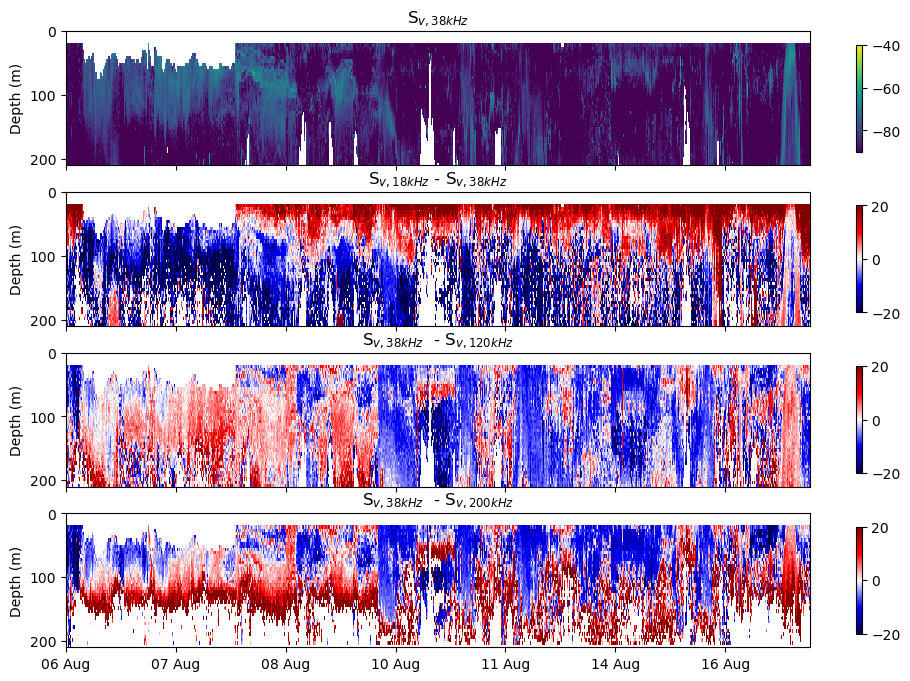

In [11]:
depth_cells = np.linspace(0,500,100)+7 # plus 7 for transducer depth

mask_Sv18_38 = Sv18_38.where(~(Sv18_38<-900) & ~(Sv18_38>900))
mask_Sv38_120 = Sv38_120.where(~(Sv38_120<-900) & ~(Sv38_120>900))
mask_Sv38_200 = Sv38_200.where(~(Sv38_200<-900) & ~(Sv38_200>900))
mask_Sv38 = Sv38.where(~(Sv38<-900) & ~(Sv38>900))
Sv38 = Sv38.where(~(Sv38<-900) & ~(Sv38>900))


fig,axes = plt.subplots(4,1, figsize=(12,8), sharex=True, sharey=True)
ax = axes.flatten()

ax_sv = ax[0].pcolor(np.arange(np.shape(mask_Sv38)[1]), depth_cells, mask_Sv38 , vmin=-90, vmax=-40, cmap=mpl.colormaps['viridis'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[0].set_ylim([210,0])
ax[0].set_xticklabels([])
ax[0].set_title('S$_{v,38kHz}$ ')
ax[0].set_ylabel('Depth (m)')

ax_sv = ax[1].pcolor(np.arange(np.shape(mask_Sv18_38)[1]), depth_cells, mask_Sv18_38 , vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[1].set_xticklabels([])
ax[1].set_title('S$_{v,18kHz}$ - S$_{v,38kHz}$ ')
ax[1].set_ylabel('Depth (m)')

ax_sv = ax[2].pcolor(np.arange(np.shape(mask_Sv38_120)[1]), depth_cells, mask_Sv38_120, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[2].set_xticklabels([])
ax[2].set_title('S$_{v,38kHz}$  - S$_{v,120kHz}$ ')
ax[2].set_ylabel('Depth (m)')

ax_sv = ax[3].pcolor(np.arange(np.shape(mask_Sv38_200)[1]), depth_cells, mask_Sv38_200, vmin=-20, vmax=20, cmap=mpl.colormaps['seismic'])
cbar = fig.colorbar(ax_sv, shrink=0.8)
ax[3].set_xticklabels([dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[0].strftime('%d %b'),
                       dtimes_18_38[2000].strftime('%d %b'),
                       dtimes_18_38[4000].strftime('%d %b'),
                       dtimes_18_38[6000].strftime('%d %b'),
                       dtimes_18_38[8000].strftime('%d %b'),
                       dtimes_18_38[10000].strftime('%d %b'),
                       dtimes_18_38[12000].strftime('%d %b')
                      ])
ax[3].set_title('S$_{v,38kHz}$  - S$_{v,200kHz}$')
ax[3].set_ylabel('Depth (m)')
fig.savefig('D:/Sermilik/Figs/dBDiff_timeseries_upper200.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Euphausiids

In [12]:
EuphA=-10; EuphAsd=3.4
EuphA1 = Sv18_38>(EuphA-EuphAsd)
EuphA2 = Sv18_38<(EuphA+EuphAsd)
EuphausiidsA = Sv18_38.where(EuphA1 & EuphA2)

EuphB = -13.8; EuphBsd=2.9
EuphB1 = Sv38_120>(EuphB-EuphBsd)
EuphB2 = Sv38_120<(EuphB+EuphBsd)
EuphausiidsB = Sv18_38.where(EuphB1 & EuphB2)

EuphC = -16.3; EuphCsd=2.9
EuphC1 = Sv38_200>(EuphC-EuphCsd)
EuphC2 = Sv38_200<(EuphC+EuphCsd)
EuphausiidsC = Sv18_38.where(EuphC1 & EuphC2)

EuphD = -9.5; EuphDsd=4
EuphD1 = Sv38_70>(EuphD-EuphDsd)
EuphD2 = Sv38_70<(EuphD+EuphDsd)
EuphausiidsD = Sv18_38.where(EuphD1 & EuphD2)

Euphausiids = EuphausiidsB.where(~np.isnan(EuphausiidsC) & ~np.isnan(EuphausiidsD))

Euphausiids_38 = Sv38.where(~np.isnan(Euphausiids))

## Jellyfish

In [13]:
JellyA=8.2; JellyAsd=1.5
JellyA1 = Sv18_38>(JellyA-JellyAsd)
JellyA2 = Sv18_38<(JellyA+JellyAsd)
JellyfishA = Sv18_38.where(JellyA1 & JellyA2)

JellyB = 2.1; JellyBsd=1.2
JellyB1 = Sv38_120>(JellyB-JellyBsd)
JellyB2 = Sv38_120<(JellyB+JellyBsd)
JellyfishB = Sv18_38.where(JellyB1 & JellyB2)

JellyC = 2.2; JellyCsd=1.3
JellyC1 = Sv38_200>(JellyC-JellyCsd)
JellyC2 = Sv38_200<(JellyC+JellyCsd)
JellyfishC = Sv18_38.where(JellyC1 & JellyC2)

Jellyfish = JellyfishA.where(~np.isnan(JellyfishB) & ~np.isnan(JellyfishC))

Jellyfish_38 = Sv38.where(~np.isnan(Jellyfish))

## Non-Swimbladdered
Following Eulachon category

In [14]:
EulaA=1.2; EulaAsd=3.2
EulaA1 = Sv18_38>(EulaA-EulaAsd)
EulaA2 = Sv18_38<(EulaA+EulaAsd)
EulachonA = Sv18_38.where(EulaA1 & EulaA2)

EulaB = -5.8; EulaBsd=2.8
EulaB1 = Sv38_120>(EulaB-EulaBsd)
EulaB2 = Sv38_120<(EulaB+EulaBsd)
EulachonB = Sv18_38.where(EulaB1 & EulaB2)

EulaC = 3.1; EulaCsd=2.5
EulaC1 = Sv38_200>(EulaC-EulaCsd)
EulaC2 = Sv38_200<(EulaC+EulaCsd)
EulachonC = Sv18_38.where(EulaC1 & EulaC2)

Eulachon = EulachonA.where(~np.isnan(EulachonB) & ~np.isnan(EulachonC))

Eulachon_38 = Sv38.where(~np.isnan(Eulachon))

## Capelin

In [15]:
CapA=2.7; CapAsd=2.8
CapA1 = Sv18_38>(CapA-CapAsd)
CapA2 = Sv18_38<(CapA+CapAsd)
CapelinA = Sv18_38.where(CapA1 & CapA2)

CapB = 3.8; CapBsd=1.7
CapB1 = Sv38_120>(EulaB-EulaBsd)
CapB2 = Sv38_120<(EulaB+EulaBsd)
CapelinB = Sv18_38.where(CapB1 & CapB2)

CapC = 3.6; CapCsd=1.8
CapC1 = Sv38_200>(CapC-CapCsd)
CapC2 = Sv38_200<(CapC+CapCsd)
CapelinC = Sv18_38.where(CapC1 & CapC2)

Capelin = CapelinA.where(~np.isnan(CapelinB) & ~np.isnan(CapelinC))

Capelin_38 = Sv38.where(~np.isnan(Capelin))

## Myctophids

In [16]:
#MycA = -15; MycAsd = 1.8
#MycA1 = Sv18_38>(MycA-MycAsd)
#MycA2 = Sv18_38<(MycA+MycAsd)
#MyctophidsA = Sv18_38.where(MycA1 & MycA2)

#MycB = 9.2; MycBsd = 1
#MycB1 = Sv38_120>(MycB-MycBsd)
#MycB2 = Sv38_120<(MycB+MycBsd)
#MyctophidsB = Sv18_38.where(MycB1 & MycB2)

#Myctophids = MyctophidsA.where(~np.isnan(MyctophidsB))

#Myctophids_38 = Sv38.where(~np.isnan(Myctophids))

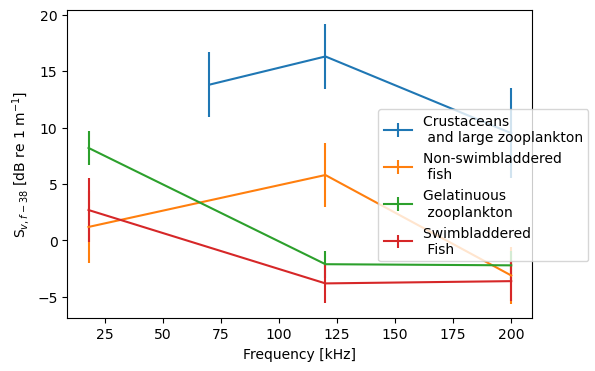

In [32]:
fig = plt.figure(figsize=(6,4))
plt.errorbar([70,120,200], [ -EuphB, -EuphC, -EuphD], yerr=[ EuphBsd, EuphCsd, EuphDsd], label='Crustaceans \n and large zooplankton')
plt.errorbar([18,120, 200], [EulaA, -EulaB, -EulaC], yerr=[EulaAsd, EulaBsd, EulaCsd], label='Non-swimbladdered \n fish')
plt.errorbar([18,120, 200], [JellyA, -JellyB, -JellyC], yerr=[JellyAsd, JellyBsd, JellyCsd], label='Gelatinuous \n zooplankton')
plt.errorbar([18,120, 200], [CapA, -CapB, -CapC], yerr=[CapAsd, CapBsd, CapCsd], label='Swimbladdered \n Fish')
#plt.errorbar([18,120], [MycA, -MycB], yerr=[MycAsd, MycBsd], label='Myctophids')
fig.legend(loc=7, fontsize=10)
plt.xlabel('Frequency [kHz]')
plt.ylabel('S$_{v, f-38}$ [dB re 1 m$^{-1}$]')

fig.savefig('D:/Sermilik/Figs/dBDiff_categories.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

C:\Users\murield\AppData\Local\Temp\ipykernel_22984\761430562.py:6: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  p0 = ax[0].pcolor(dtimes_18_38, depth_cells, Capelin_38, cmap='magma_r', vmin=-120)
C:\Users\murield\AppData\Local\Temp\ipykernel_22984\761430562.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(p0, ax=ax[0])
C:\Users\murield\AppData\Local\Temp\ipykernel_22984\761430562.py:13: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges

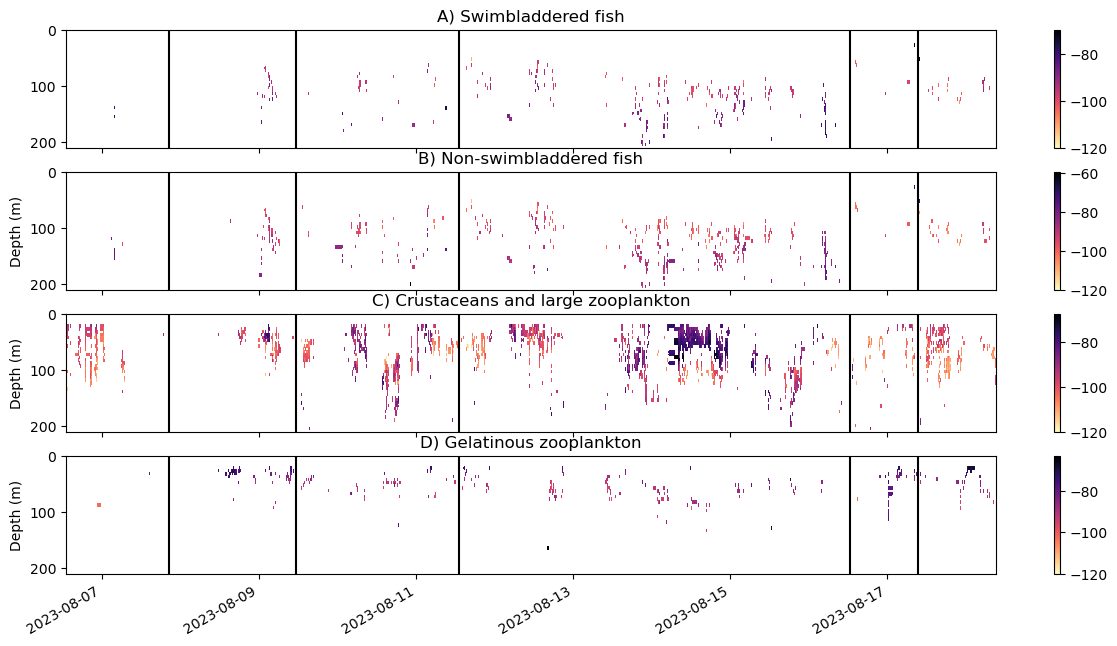

In [35]:
GPS_dist = Sv18_38[1]

fig,axes = plt.subplots(4,1, figsize=(15,8), sharex=True, sharey=True)
ax = axes.flatten()

p0 = ax[0].pcolor(dtimes_18_38, depth_cells, Capelin_38, cmap='magma_r', vmin=-120)
ax[0].invert_yaxis()
ax[0].set_title('A) Swimbladdered fish')
ax[0].set_ylim([0,210])
fig.colorbar(p0, ax=ax[0])
plt.gcf().autofmt_xdate()

p1 = ax[1].pcolor(dtimes_18_38, depth_cells, Eulachon_38, cmap='magma_r', vmin=-120)
ax[1].invert_yaxis()
ax[1].set_title('B) Non-swimbladdered fish')
fig.colorbar(p1, ax=ax[1])
ax[1].set_ylabel('Depth (m)')

p2 = ax[2].pcolor(dtimes_18_38, depth_cells, Euphausiids_38, cmap='magma_r', vmin=-120)
ax[2].invert_yaxis()
ax[2].set_title('C) Crustaceans and large zooplankton')
fig.colorbar(p2, ax=ax[2])
ax[2].set_ylabel('Depth (m)')

p3 = ax[3].pcolor(dtimes_18_38, depth_cells, Jellyfish_38, cmap='magma_r', vmin=-120)
ax[3].invert_yaxis()
ax[3].set_title('D) Gelatinous zooplankton')
fig.colorbar(p3, ax=ax[3])
ax[3].set_ylabel('Depth (m)')
plt.gcf().autofmt_xdate()
for i in range(4):
    ax[i].axvline(x=trawl1, c='k')
    ax[i].axvline(x=trawl2, c='k')
    ax[i].axvline(x=trawl3, c='k')
    ax[i].axvline(x=trawl4, c='k')
    ax[i].axvline(x=trawl5, c='k')

fig.savefig('D:/Sermilik/Figs/SvTimeSeries_bygroup.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Vertical profiles

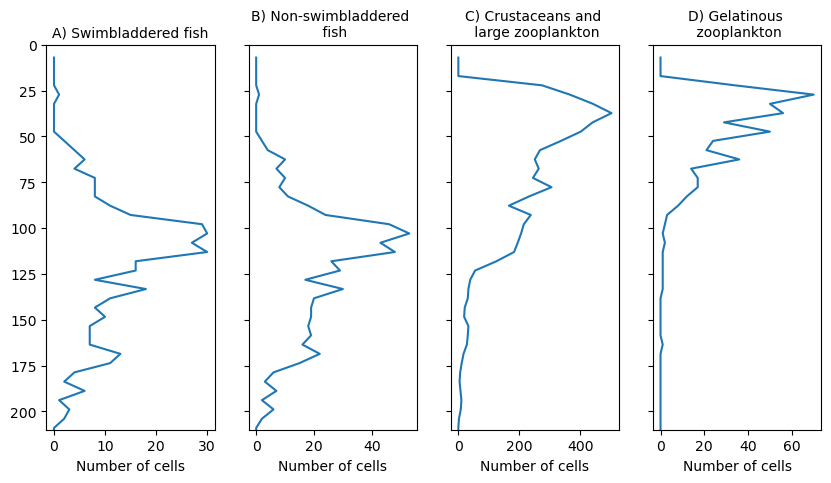

In [19]:
fig,axes = plt.subplots(1,4, figsize=(10,5), sharey=True)
ax = axes.flatten()

ax[0].plot(np.sum(~np.isnan(Capelin_38),axis=1), depth_cells)
ax[0].invert_yaxis()
ax[0].set_title('A) Swimbladdered fish', fontsize=10)
ax[0].set_xlabel('Number of cells')
ax[0].set_ylim([0,210])

ax[1].plot(np.sum(~np.isnan(Eulachon_38),axis=1), depth_cells)
ax[1].invert_yaxis()
ax[1].set_title('B) Non-swimbladdered \n fish', fontsize=10)
ax[1].set_xlabel('Number of cells')


ax[2].plot(np.sum(~np.isnan(Euphausiids_38),axis=1), depth_cells)
ax[2].invert_yaxis()
ax[2].set_title('C) Crustaceans and \n large zooplankton', fontsize=10)
ax[2].set_xlabel('Number of cells')


ax[3].plot(np.sum(~np.isnan(Jellyfish_38),axis=1), depth_cells)
ax[3].invert_yaxis()
ax[3].set_title('D) Gelatinous \n zooplankton', fontsize=10)
ax[3].set_xlabel('Number of cells')

fig.savefig('D:/Sermilik/Figs/Vertical_profiles_nomyc.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## Calculate NASC

In [20]:
cap_sv = 10**(Capelin_38/10)
eula_sv = 10**(Eulachon_38/10)
euph_sv = 10**(Euphausiids_38/10)
jelly_sv = 10**(Jellyfish_38/10)

In [21]:
## Sv profile

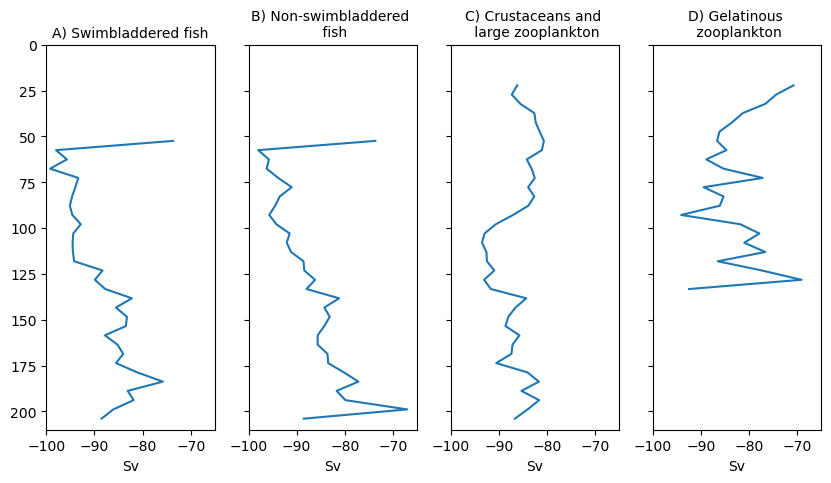

In [22]:
fig,axes = plt.subplots(1,4, figsize=(10,5), sharey=True, sharex=True)
ax = axes.flatten()


ax[0].plot(10*np.log10(np.mean(cap_sv,axis=1)), depth_cells, '-')
ax[0].invert_yaxis()
ax[0].set_title('A) Swimbladdered fish', fontsize=10)
ax[0].set_xlabel('Sv')
ax[0].set_xlim([-100,-65])
ax[0].set_ylim([0,210])


ax[1].plot(10*np.log10(np.mean(eula_sv,axis=1)), depth_cells, '-')
ax[1].invert_yaxis()
ax[1].set_title('B) Non-swimbladdered \n fish', fontsize=10)
ax[1].set_xlabel('Sv')



ax[2].plot(10*np.log10(np.mean(euph_sv,axis=1)), depth_cells, '-')
ax[2].invert_yaxis()
ax[2].set_title('C) Crustaceans and \n large zooplankton', fontsize=10)
ax[2].set_xlabel('Sv')


ax[3].plot(10*np.log10(np.mean(jelly_sv,axis=1)), depth_cells, '-')
ax[3].invert_yaxis()
ax[3].set_title('D) Gelatinous \n zooplankton', fontsize=10)
ax[3].set_xlabel('Sv')

fig.savefig('D:/Sermilik/Figs/Vertical_profiles_Sv_nomyc.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

In [23]:
# Depth is determine by the deepest cell with a value (adjusted to cell parameters, 12 index and 5m)
depth = (Sv38.apply(lambda series: series.last_valid_index())-12)*5

In [24]:
depth_shallow = depth.copy()
filter = depth_shallow>200
depth_shallow[filter] = 200

In [25]:
# Depth because we use the whole water column - 15 m at surface
NASC_cap = 4*np.pi*1852*1852*np.sum(cap_sv, axis=0)/((depth_shallow-20)/5)
NASC_eula = 4*np.pi*1852*1852*np.sum(eula_sv, axis=0)/((depth_shallow-20)/5)
NASC_euph = 4*np.pi*1852*1852*np.sum(euph_sv, axis=0)/((depth_shallow-20)/5)
NASC_jelly = 4*np.pi*1852*1852*np.sum(jelly_sv, axis=0)/((depth_shallow-20)/5)

## Prepare for maps

In [27]:
lats = df_38[6]
lons = df_38[7]

lat_lim = [np.min(lats), np.max(lats)]
lon_lim = [np.min(lons), np.max(lons)]

In [28]:
distance_nmi = df_38[2]-df_38.iloc[0,2]

In [29]:
dist_10 = (distance_nmi/10).round().astype(int)

In [37]:
lats_10 = np.empty([np.max(dist_10)])
lons_10 = np.empty([np.max(dist_10)])
cap_10 = np.empty([np.max(dist_10)])
eula_10 = np.empty([np.max(dist_10)])
euph_10 = np.empty([np.max(dist_10)])
jelly_10 = np.empty([np.max(dist_10)])


for i in range(np.max(dist_10)):
    ind = dist_10 == i
    lats_10[i] = np.mean(lats[ind])
    lons_10[i] = np.mean(lons[ind])
    cap_10[i] = np.mean(NASC_cap[ind])
    eula_10[i] = np.mean(NASC_eula[ind])
    euph_10[i] = np.mean(NASC_euph[ind])
    jelly_10[i] = np.mean(NASC_jelly[ind])

## Maps

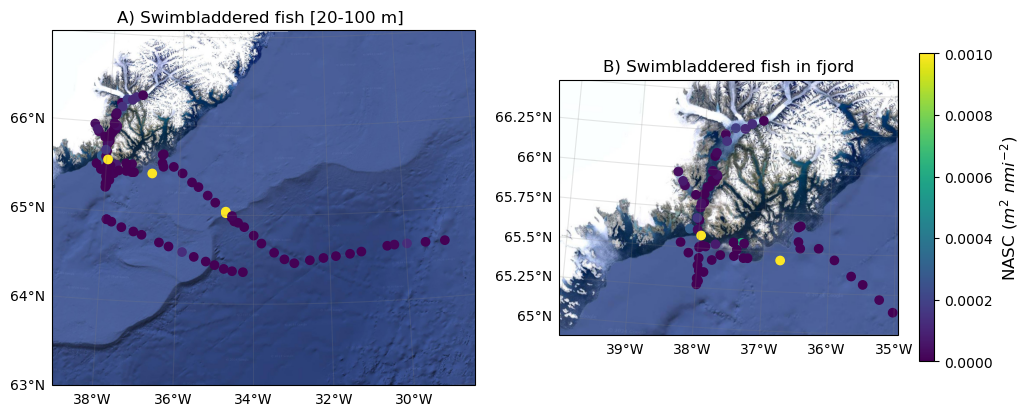

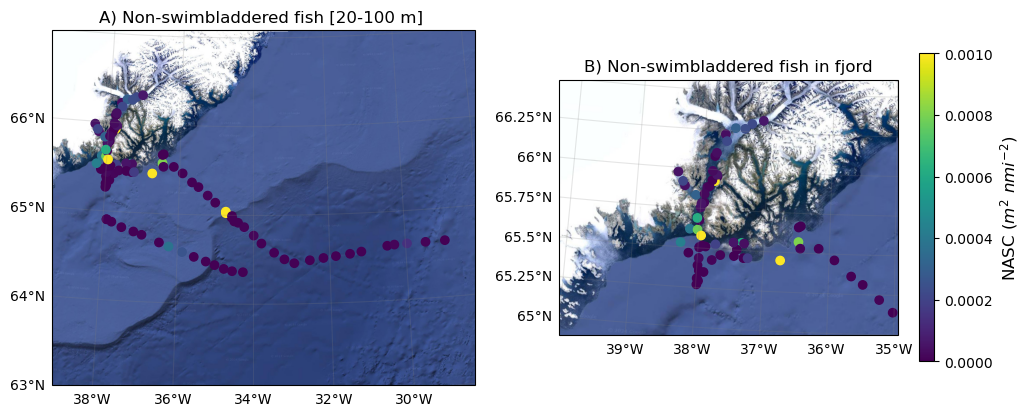

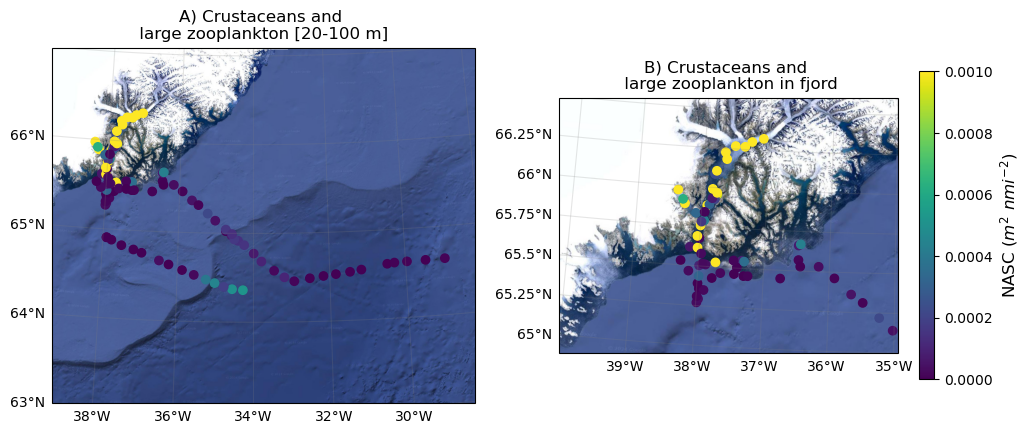

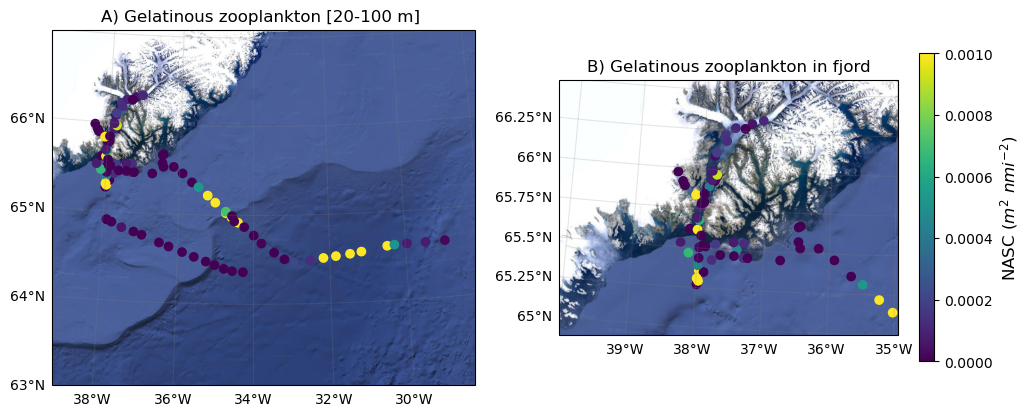

In [78]:
group = [ cap_10, eula_10, euph_10, jelly_10]
name = ['Swimbladdered fish','Non-swimbladdered fish', 'Crustaceans and \n large zooplankton','Gelatinous zooplankton']
filename = [ 'cap', 'eula', 'euph', 'jelly']
for i in range(len(group)):
    fig, axes   = plt.subplots(1, 2, figsize=(12,8), subplot_kw={'projection': ccrs.Orthographic(central_longitude = -34, central_latitude = 65)})
    ax = axes.flatten()
    
    # Set extent to study region
    extent_0=[-39, -28.5, 63 ,67]
    extent_1=[-40, -35, 65 ,66.5]
    ax[0].set_extent(extent_0, crs = ccrs.PlateCarree())
    ax[1].set_extent(extent_1, crs = ccrs.PlateCarree())
    
    # Add the Stamen aerial imagery at zoom level 7.
    #tiler = Stamen('terrain-background')
    tiler = GoogleTiles(style = 'satellite')
    ax[0].add_image(tiler, 8)
    ax[1].add_image(tiler, 8)
    
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
    # Add transects
    gl = ax[0].gridlines(color='grey', alpha=0.2, draw_labels = True)
    gl.top_labels = False
    gl.right_labels = False
    ax_s = ax[0].scatter(lons_10, lats_10, c=group[i], transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
    ax_s.set_clim([0,0.001])
    ax[0].set_title(f'A) {name[i]} [20-100 m] ')
    
    # Add zoom map
    gl_1 = ax[1].gridlines(color='grey', alpha=0.2, draw_labels = True)
    gl_1.top_labels = False
    gl_1.right_labels = False
    
    ax_s = ax[1].scatter(lons_10, lats_10, c=group[i], transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
    ax_s.set_clim([0,0.001])
    cbar = fig.colorbar(ax_s, shrink=0.5)
    cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
    ax[1].set_title(f'B) {name[i]} in fjord')

    fig.savefig(f'D:/Sermilik/Figs/Map_{filename[i]}', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

## NASC upper 100 m

In [59]:
depth_100 = depth.copy()
filter = depth_100>100
depth_100[filter] = 100

In [60]:
dep_100_ind = np.max(np.where(depth_cells < 100))

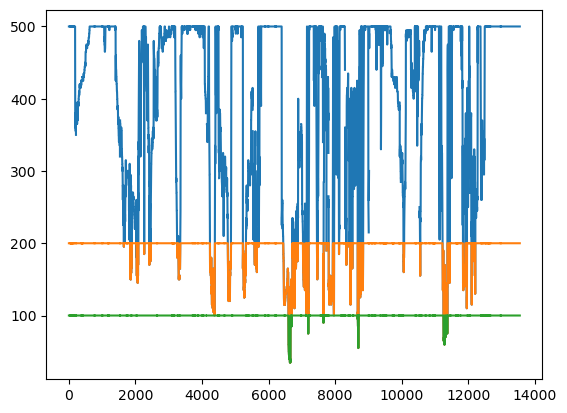

In [73]:
plt.plot(depth)
plt.plot(depth_shallow)
plt.plot(depth_100)


In [74]:
# Depth because we use the whole water column - 15 m at surface
NASC_cap_100 = 4*np.pi*1852*1852*np.sum(cap_sv[:dep_100_ind], axis=0)/((depth_100-20)/5)
NASC_eula_100 = 4*np.pi*1852*1852*np.sum(eula_sv[:dep_100_ind], axis=0)/((depth_100-20)/5)
NASC_euph_100 = 4*np.pi*1852*1852*np.sum(euph_sv[:dep_100_ind], axis=0)/((depth_100-20)/5)
NASC_jelly_100 = 4*np.pi*1852*1852*np.sum(jelly_sv[:dep_100_ind], axis=0)/((depth_100-20)/5)

In [75]:
lats_10 = np.empty([np.max(dist_10)])
lons_10 = np.empty([np.max(dist_10)])
cap100_10 = np.empty([np.max(dist_10)])
eula100_10 = np.empty([np.max(dist_10)])
euph100_10 = np.empty([np.max(dist_10)])
jelly100_10 = np.empty([np.max(dist_10)])

In [76]:
for i in range(np.max(dist_10)):
    ind = dist_10 == i
    lats_10[i] = np.mean(lats[ind])
    lons_10[i] = np.mean(lons[ind])
    cap100_10[i] = np.mean(NASC_cap_100[ind])
    eula100_10[i] = np.mean(NASC_eula_100[ind])
    euph100_10[i] = np.mean(NASC_euph_100[ind])
    jelly100_10[i] = np.mean(NASC_jelly_100[ind])

In [ ]:
group = [ cap100_10, eula100_10, euph100_10, jelly100_10]
name = ['Swimbladdered fish','Non-swimbladdered fish', 'Crustaceans and \n large zooplankton','Gelatinous zooplankton']
filename = [ 'cap', 'eula', 'euph', 'jelly']
for i in range(len(group)):
    fig, axes   = plt.subplots(1, 2, figsize=(12,8), subplot_kw={'projection': ccrs.Orthographic(central_longitude = -34, central_latitude = 65)})
    ax = axes.flatten()
    
    # Set extent to study region
    extent_0=[-39, -28.5, 63 ,67]
    extent_1=[-40, -35, 65 ,66.5]
    ax[0].set_extent(extent_0, crs = ccrs.PlateCarree())
    ax[1].set_extent(extent_1, crs = ccrs.PlateCarree())
    
    # Add the Stamen aerial imagery at zoom level 7.
    #tiler = Stamen('terrain-background')
    tiler = GoogleTiles(style = 'satellite')
    ax[0].add_image(tiler, 8)
    ax[1].add_image(tiler, 8)
    
    land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='black',
                                        facecolor=cfeature.COLORS['land'])
    # Add transects
    gl = ax[0].gridlines(color='grey', alpha=0.2, draw_labels = True)
    gl.top_labels = False
    gl.right_labels = False
    ax_s = ax[0].scatter(lons_10, lats_10, c=group[i], transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
    ax_s.set_clim([0,0.001])
    ax[0].set_title(f'A) {name[i]} ')
    
    # Add zoom map
    gl_1 = ax[1].gridlines(color='grey', alpha=0.2, draw_labels = True)
    gl_1.top_labels = False
    gl_1.right_labels = False
    
    ax_s = ax[1].scatter(lons_10, lats_10, c=group[i], transform=ccrs.PlateCarree(), cmap=sns.color_palette("viridis", as_cmap=True))
    ax_s.set_clim([0,0.0001])
    cbar = fig.colorbar(ax_s, shrink=0.5)
    cbar.set_label('NASC ($m^2 \ nmi^{-2}$)', fontsize=12)
    ax[1].set_title(f'B) {name[i]} in fjord [20-100 m]')

    fig.savefig(f'D:/Sermilik/Figs/Map_{filename[i]}_upper100', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')

# Center of mass

In [ ]:

d_cap = ndimage.center_of_mass(np.mean(cap_sv,axis=1))
d_eula = ndimage.center_of_mass(np.mean(eula_sv,axis=1))
d_euph = ndimage.center_of_mass(np.mean(euph_sv,axis=1))
d_jelly = ndimage.center_of_mass(np.mean(jelly_sv,axis=1))



In [ ]:

d_cap = ndimage.center_of_mass(np.mean(cap_sv,axis=1))
d_eula = ndimage.center_of_mass(np.mean(eula_sv,axis=1))
d_euph = ndimage.center_of_mass(np.mean(euph_sv,axis=1))
d_jelly = ndimage.center_of_mass(np.mean(jelly_sv,axis=1))

In [ ]:
d_cap

In [ ]:
cm_myc = depth_cells[np.round(d_myc)[0].astype(int)]
cm_cap = depth_cells[np.round(d_cap)[0].astype(int)]
cm_eula = depth_cells[np.round(d_eula)[0].astype(int)]
cm_euph = depth_cells[np.round(d_euph)[0].astype(int)]
cm_jelly = depth_cells[np.round(d_jelly)[0].astype(int)]

In [ ]:
print(cm_myc,cm_cap,cm_eula,cm_euph,cm_jelly)

In [ ]:
fig,axes = plt.subplots(1,4, figsize=(10,5), sharey=True, sharex=True)
ax = axes.flatten()

ax[0].plot(10*np.log10(np.mean(cap_sv,axis=1)), depth_cells, '-')
ax[0].invert_yaxis()
ax[0].set_title('A) Swimbladdered fish', fontsize=10)
ax[0].set_xlabel('Sv')
ax[0].set_xlim([-100,-65])
ax[0].set_ylim([0,210])
ax[0].axhline(y=cm_cap, ls='--', c='k')


ax[1].plot(10*np.log10(np.mean(eula_sv,axis=1)), depth_cells, '-')
ax[1].invert_yaxis()
ax[1].set_title('B) Non-swimbladdered \n fish', fontsize=10)
ax[1].set_xlabel('Sv')
ax[1].axhline(y=cm_eula, ls='--', c='k')


ax[2].plot(10*np.log10(np.mean(euph_sv,axis=1)), depth_cells, '-')
ax[2].invert_yaxis()
ax[2].set_title('C) Crustaceans and \n large zooplankton', fontsize=10)
ax[2].set_xlabel('Sv')
ax[2].axhline(y=cm_euph, ls='--', c='k')


ax[3].plot(10*np.log10(np.mean(jelly_sv,axis=1)), depth_cells, '-')
ax[3].invert_yaxis()
ax[3].set_title('D) Gelatinous \n zooplankton', fontsize=10)
ax[3].set_xlabel('Sv')
ax[3].axhline(y=cm_jelly, ls='--', c='k')

fig.savefig('D:/Sermilik/Figs/Vertical_profiles_Sv_nomyc.png', dpi = 300, facecolor='w', transparent=False, bbox_inches='tight')